In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.5)

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2022-11-24 15:29:25.066851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 15:29:25.193076: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-24 15:29:25.628504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-24 15:29:25.628557: W tensorflow/compiler/xla/strea

1 Physical GPUs, 1 Logical GPUs


2022-11-24 15:29:26.038064: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 15:29:26.044854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 15:29:26.045104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 15:29:26.045908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
## 모델을 만들어보자!!

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # Flatten 펴주는 역할
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10


2022-11-24 15:29:31.335067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-24 15:29:31.336364: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7ff8d7ffce80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-24 15:29:31.336377: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-24 15:29:31.339511: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-11-24 15:29:31.425769: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 2s 1ms/step - loss: 0.2221 - accuracy: 0.9358 - val_loss: 0.1124 - val_accuracy: 0.9653
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.0797 - val_accuracy: 0.9756
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0612 - val_accuracy: 0.9815
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.0674 - val_accuracy: 0.9796
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0615 - val_accuracy: 0.9799
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0604 - val_accuracy: 0.9808
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0652 - val_accuracy: 0.9798
Epoch 8/10
600/60

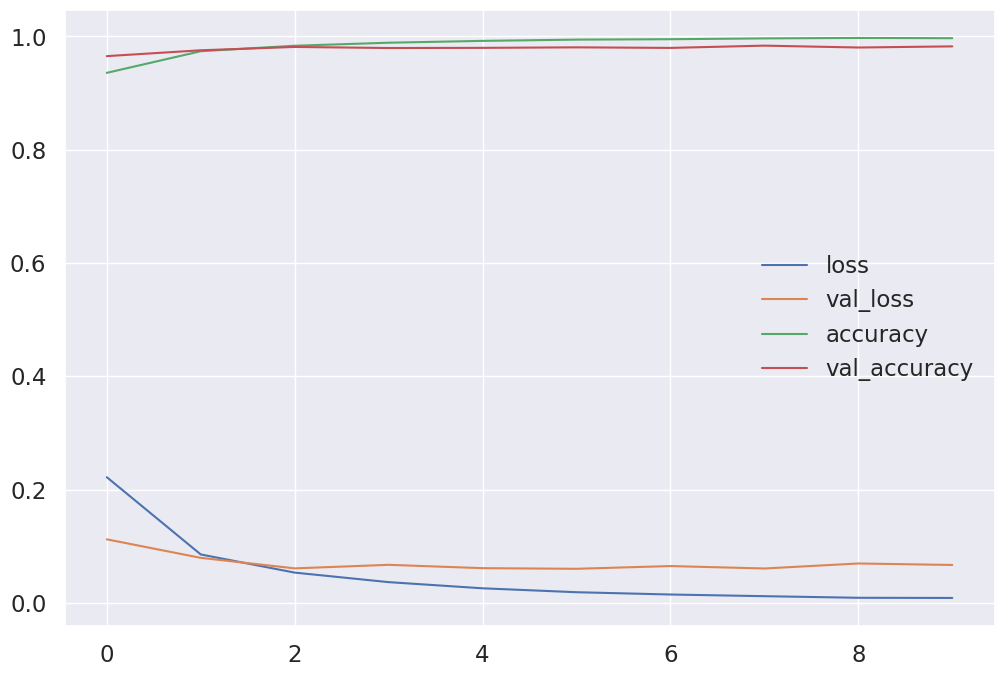

In [7]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid('balck')
plt.show()

In [8]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9825
Test loss : 0.06716223061084747
Test accuracy : 0.9825000166893005


In [9]:
## 뭐가 틀렸는지 확인해보자!!

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 676us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [10]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [11]:
## 틀린 데이터의 인덱스만 모아서!!/

wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

175

In [12]:
## 그중 16개만 확인해봦

import random

samples = random.choices(population=wrong_result, k=16)
samples

[2004,
 9867,
 1395,
 2930,
 582,
 1549,
 4350,
 4639,
 3902,
 1178,
 4497,
 9839,
 8527,
 445,
 3503,
 3023]

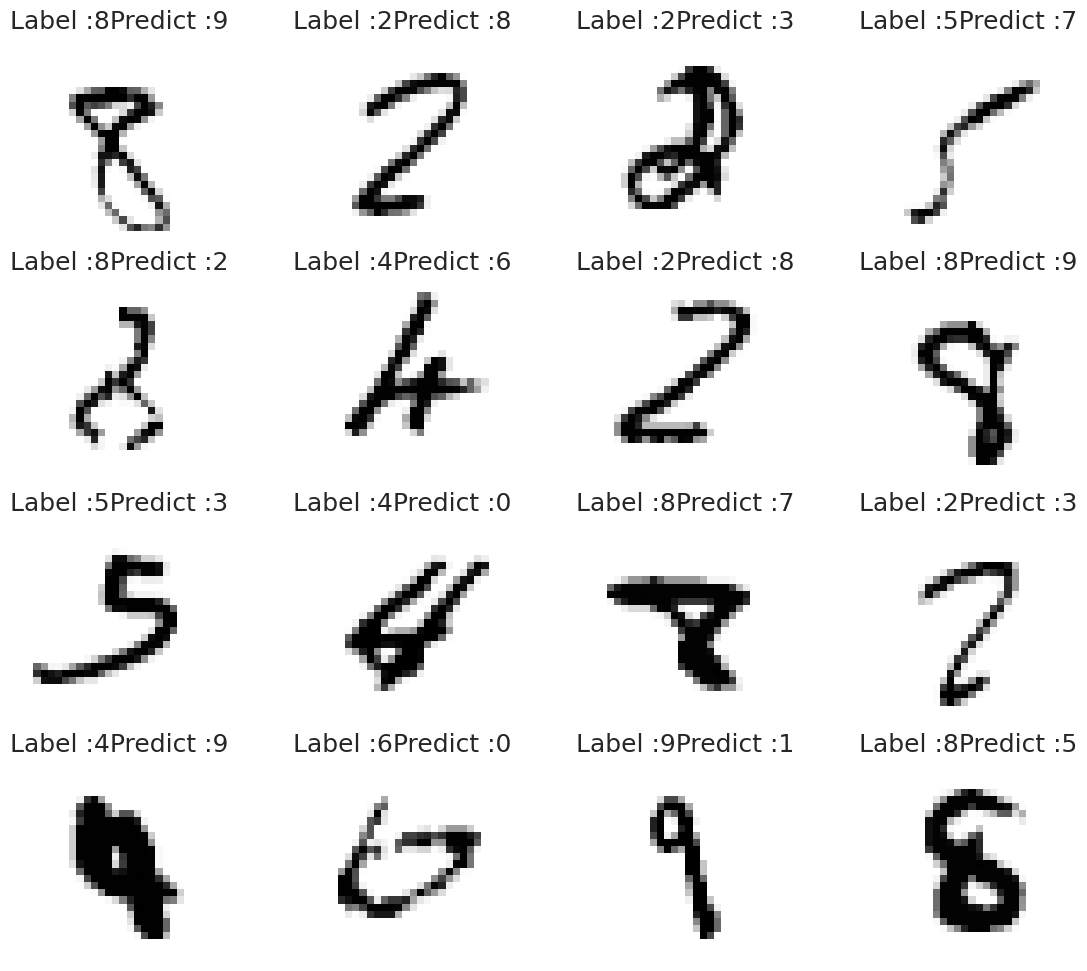

In [13]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

---

# Mnist Fashion

---

In [14]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [15]:
## 데이터 생김새 확인해보자!!

import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0, len(y_train)), k=16)

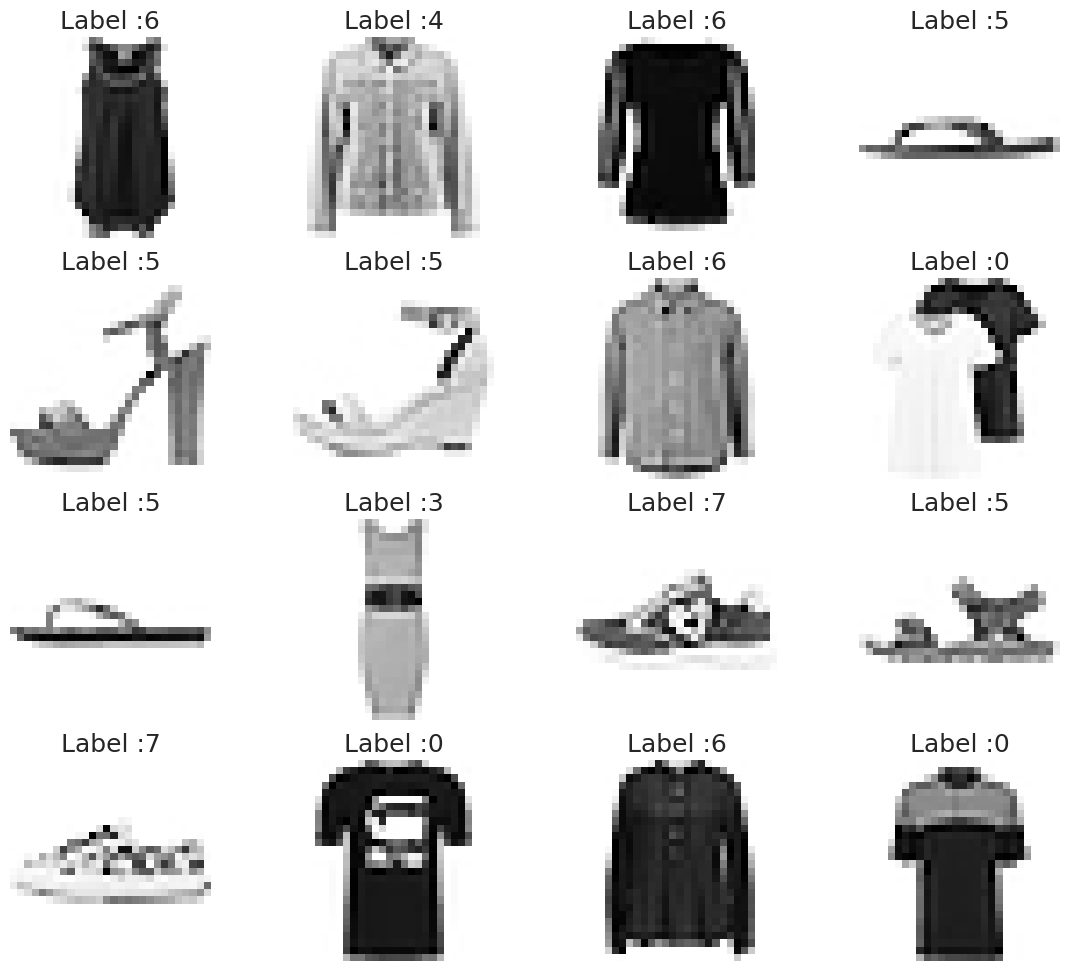

In [16]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_train[n]))
    plt.axis('off')
    
plt.show()

In [17]:
# 모델은 숫자때와 동일한 구조로 형성하자!!

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # Flatten 펴주는 역할
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

# epoch 를 너무 늘리면 과적합 된다!!

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4854 - accuracy: 0.8290 - val_loss: 0.4350 - val_accuracy: 0.8446
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3611 - accuracy: 0.8692 - val_loss: 0.4275 - val_accuracy: 0.8493
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8819 - val_loss: 0.3518 - val_accuracy: 0.8738
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2973 - accuracy: 0.8892 - val_loss: 0.3404 - val_accuracy: 0.8768
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.8974 - val_loss: 0.3406 - val_accuracy: 0.8752
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2642 - accuracy: 0.9021 - val_loss: 0.3433 - val_accuracy: 0.8799
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2522 - accuracy: 0.9055 - val_loss: 0.3347 - val_accuracy: 0.8817
Epoch 

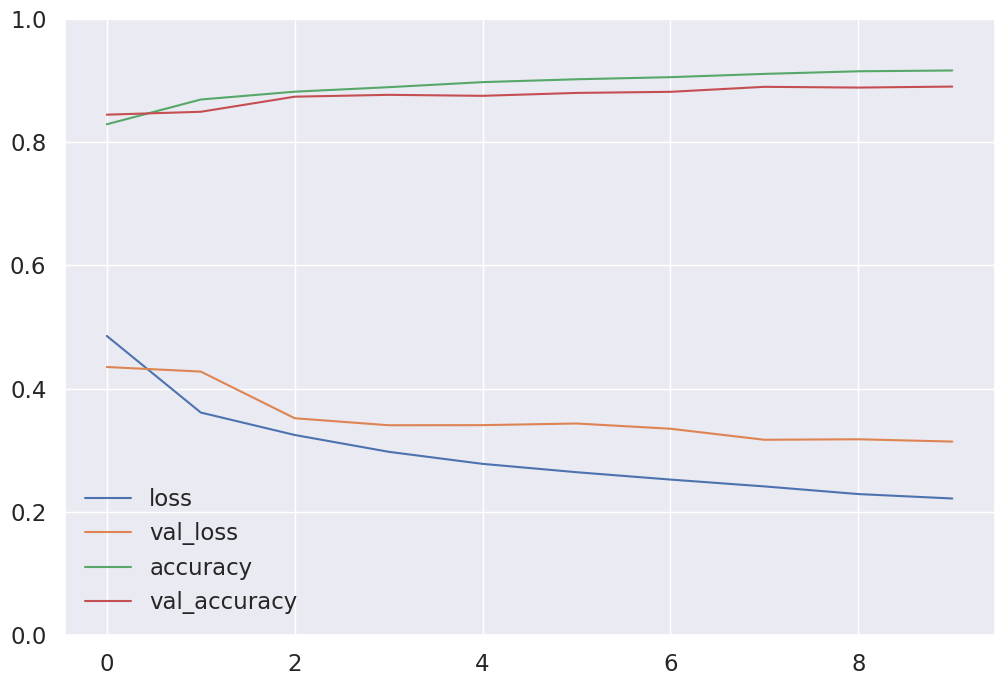

In [20]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.ylim(0, 1, 0.1)
plt.grid('white')
plt.show()

### 학습이 잘 되긴 했지만, val_loss와 train_loss 사시에 간격이 발생했다.

In [21]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 0s 886us/step - loss: 0.3139 - accuracy: 0.8902
Test loss : 0.3139200210571289
Test accuracy : 0.8902000188827515


In [22]:
## 뭐가 틀렸는지 확인해보자!!

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 599us/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [23]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [24]:
## 틀린 데이터의 인덱스만 모아서!!/

wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1098

In [25]:
## 그중 16개만 확인해봦

import random

samples = random.choices(population=wrong_result, k=16)
samples

[1726,
 8949,
 8877,
 2840,
 6156,
 4067,
 1930,
 5971,
 1408,
 1712,
 2337,
 2548,
 4169,
 750,
 3457,
 7130]

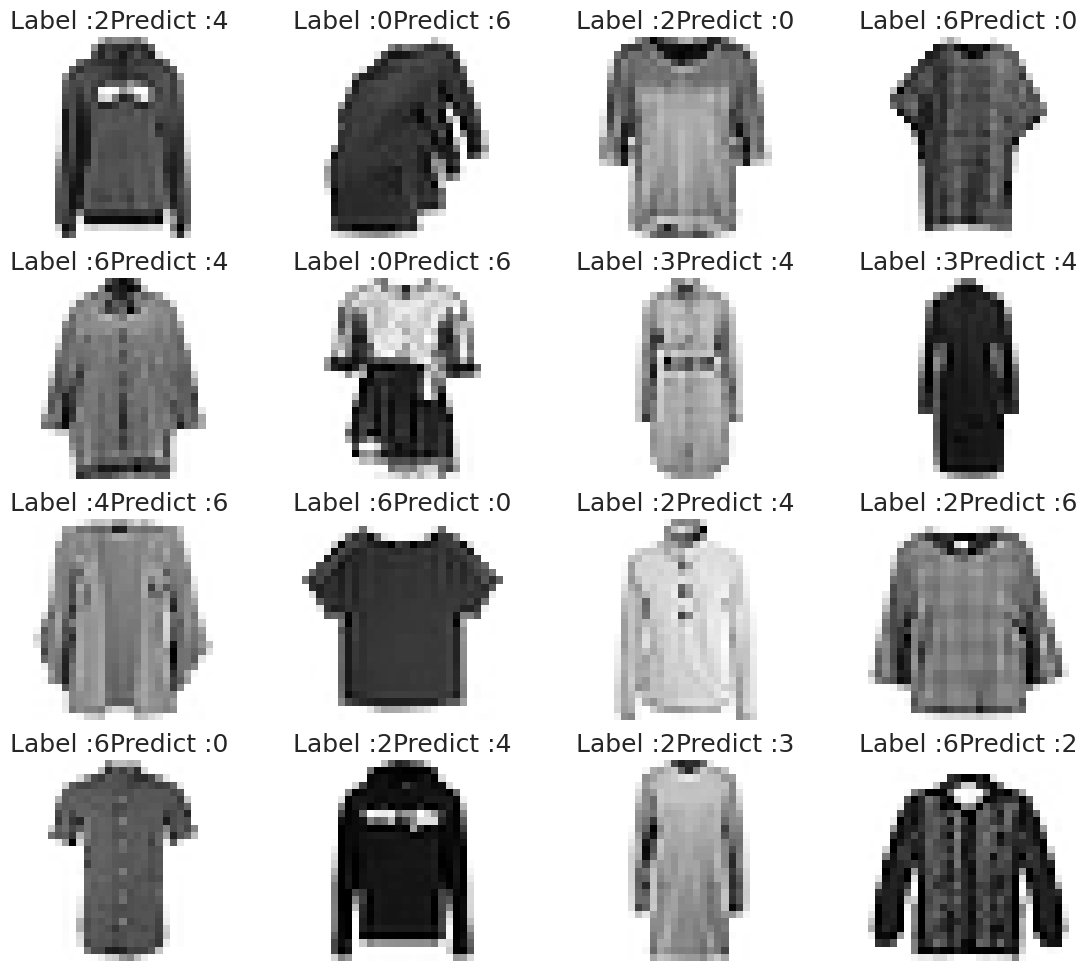

In [26]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

- 0: 티셔츠
- 1: 바지
- 2: 스웨터
- 3: 드레스
- 4: 코트
- 5: 샌들
- 6: 셔츠
- 7: 운동화
- 8: 가방
- 9: 부츠